<a href="https://colab.research.google.com/github/aurisaprastika/Classification/blob/main/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION**

Akan dibuat model classification menggunakan data bank.csv (https://www.kaggle.com/janiobachmann/bank-marketing-dataset), dimana dalam data ini terdapat 17 atribute, antara lain:


*   age : usia calon nasabah
*   job : pekerjaan calon nasabah
*   marital : status pernikahan (married, single, divorce)
*   education : tingkat pendidikan nasabah (secondary, primary, tertiary,unknown)
*   default : memiliki kredit secara default atau tidak (yes, no)
*   balance : jumlah saldo
*   housing : memiliki cicilan rumah atau tidak (yes, no)
*   loan : memiliki pinjaman pribadi atau tidak (yes, no)
*   contact : tipe kontak komunikasi yang digunakan (telephone, cellular, unknown)
*   day : terakhir dihubungi pada hari ke berapa
*   month : terakhir dihubungi pada bulan apa dalam satu tahun (januari hingga desember)
*   duration : lama dihubungi dalam detik
*   campaign : jumlah kontak yang dilakukan selama kampanye dan nasabah ini
*   pdays : jumlah hari yang berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya
*   previous : jumlah kontak yang dilakukan sebelum kampanye dan nasabah ini
*   poutcome : hasil dari kampanye pemasaran sebelumnya
*   deposit : nasabah melakukan melakukan deposit atau tidak (yes, no)








## **Import Libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

In [73]:
# Import Data to Google Colab
df_bank = pd.read_csv('https://raw.githubusercontent.com/aurisaprastika/Classification/main/data/bank.csv', sep = ',')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [74]:
# Show Dataset Information
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Terdapat 2 tipe data yaitu
*   **tipe numerik** : age, balance, day, duration, campaign, pdays, previous
*   **tipe objek** : job, marital, education, default, housing, loan, contact, month, poutcome, deposit



In [75]:
# cek data kosong
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

tidak ada data yang kosong

In [76]:
# cek duplikasi data
df_bank.duplicated().sum()

0

tidak ada duplikasi data

Untuk melihat perbandingan target (deposit) yang datasetnya akan diklasifikasikan 

no     5873
yes    5289
Name: deposit, dtype: int64


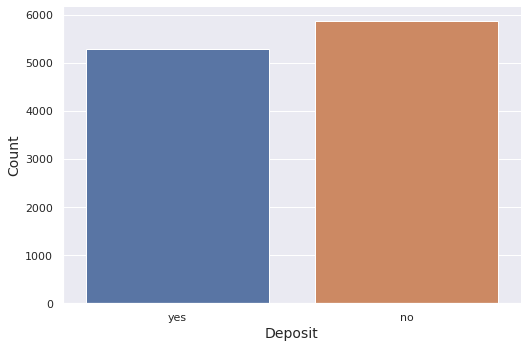

In [77]:
c_depo = df_bank['deposit'].value_counts()
print(c_depo)
sns.catplot(x='deposit',kind="count", data=df_bank, height=5, aspect=1.5)
plt.xlabel("Deposit", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

Kemudian akan mengubah atribute **default, housing, loan, dan deposit** menjadi angka dengan ketentuan:

1.   NO = 0
2.   YES = 1



In [78]:
df_bank['default'].replace('no', 0, inplace=True)
df_bank['default'].replace('yes', 1, inplace=True)
df_bank['housing'].replace('no', 0, inplace=True)
df_bank['housing'].replace('yes', 1, inplace=True)
df_bank['loan'].replace('no', 0, inplace=True)
df_bank['loan'].replace('yes', 1, inplace=True)
df_bank['deposit'].replace('no', 0, inplace=True)
df_bank['deposit'].replace('yes', 1, inplace=True)
df_bank.month.replace(('jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,673,2,-1,0,unknown,1


In [79]:
# Prints Descriptive Statistics
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
default,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.00,1.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.00,1.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
month,11162.0,6.190826,2.572792,1.0,5.0,6.0,8.00,12.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0


In [80]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## **Encode Categorical Data**

Melakukan encode categorical data yang memiliki 2 variabel yang akan diganti dengan unique variable sebagai berikut.


*   job ('admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
*   marital ('divorced', 'married', 'single')
*   education ('primary', 'secondary', 'tertiary', 'unknown')
*   contact ('cellular', 'telephone', 'unknown')
*   poutcome ('failure', 'other', 'success', 'unknown')


In [81]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[['job', 'marital', 'education', 'contact','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'contact','poutcome'])

# Replace Categotical Data with Encoded Data
df_bank.drop(['job', 'marital', 'education', 'contact','poutcome'] ,axis=1, inplace=True)
df_encoded = pd.concat([df_bank, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,6,83,4,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,8,156,2,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,5,9,2,172,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## **Set Future and Target**

In [82]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,6,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,8,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,5,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
# Select Target
target = df_bank['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

## **Set Training and Testing Data**

In [84]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 37)
(2233, 37)
(8929,)
(2233,)


In [85]:
X_test

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,0,554,1,0,5,2,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,0,514,1,1,20,4,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,0,277,0,0,14,5,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4337,39,0,91,0,0,3,9,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2438,40,0,0,0,0,6,8,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,36,0,465,1,0,20,5,160,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4360,28,0,1377,1,0,14,5,688,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2316,52,0,1306,0,0,15,6,288,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5073,30,0,102,1,0,18,12,364,3,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Klasifikasi menggunakan metode Decision Tree**

Modeling Decision Tree

In [88]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

In [89]:
dfe_col = print(df_encoded.columns.tolist())

['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


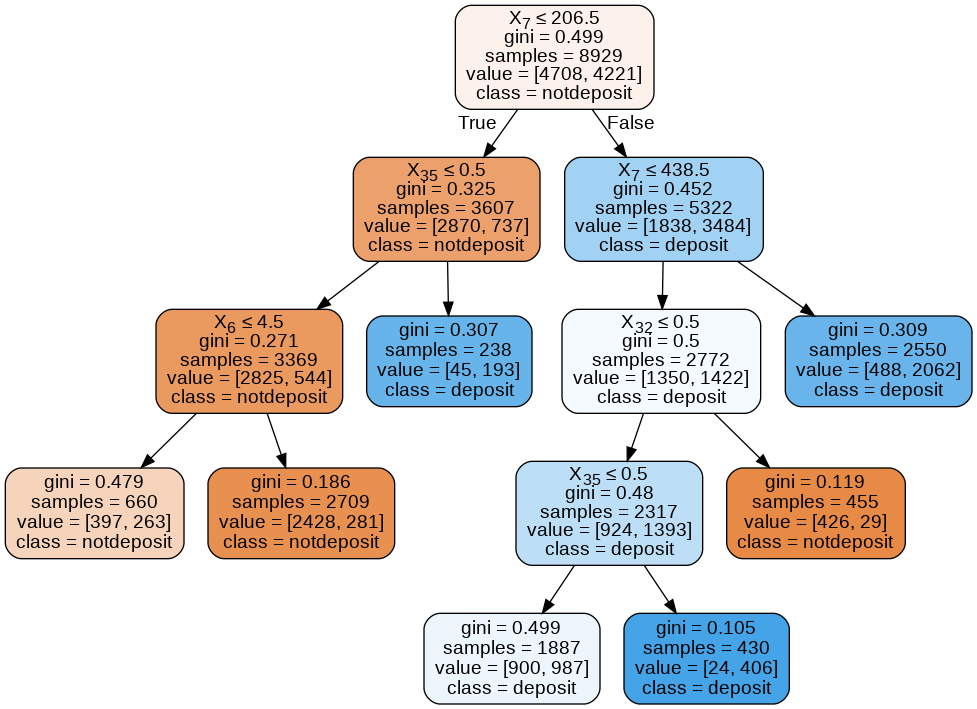

In [90]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notdeposit', 'deposit'],
                feature_names=dfe_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model Evaluation

In [91]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[815, 350],
       [157, 911]])

In [92]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7729511867442902
Precision: 0.7224425059476606
Recall: 0.852996254681648
F1 Score: 0.7823100042936882
Cohens Kappa Score: 0.5484410454693576


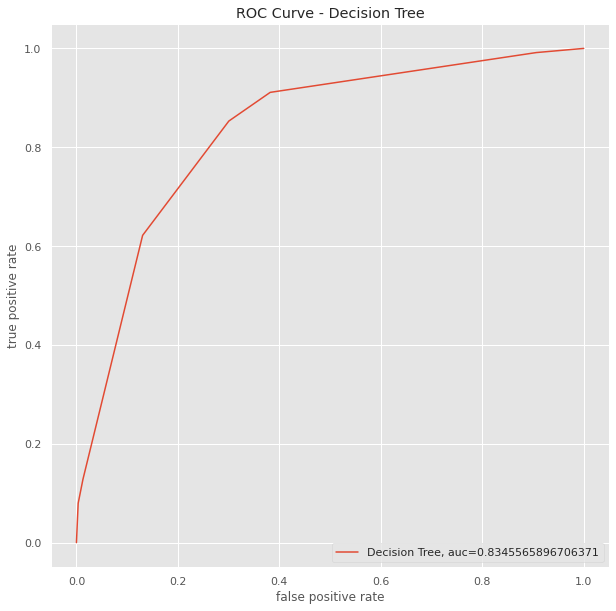

In [93]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Klasifikasi menggunakan metode Neive Bayes**

Modeling Neive Bayes

In [94]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

Model Evaluation

In [95]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[915, 250],
       [382, 686]])

In [96]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7169726824899239
Precision: 0.7329059829059829
Recall: 0.6423220973782772
F1 Score: 0.6846307385229541
Cohens Kappa Score: 0.42994204317597573


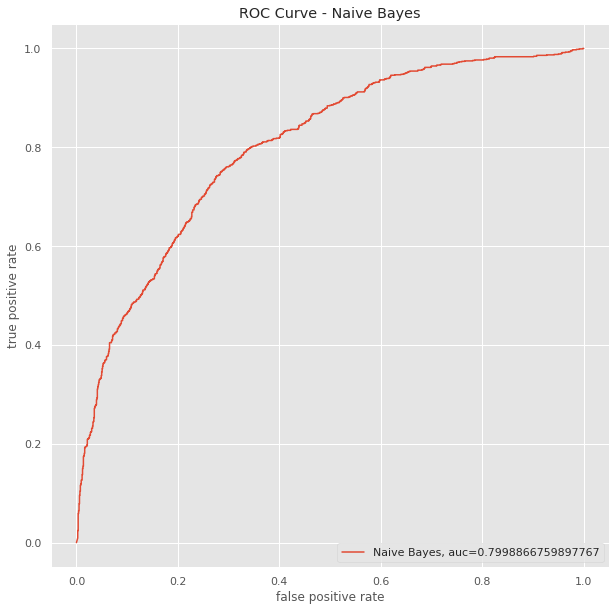

In [97]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Klasifikasi menggunakan Modelling K-Nearest Neighbor**

Modelling K-Nearest Neighbor

In [98]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test)

Model Evaluation

In [99]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[917, 248],
       [305, 763]])

In [100]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7523510971786834
Precision: 0.7546983184965381
Recall: 0.7144194756554307
F1 Score: 0.7340067340067341
Cohens Kappa Score: 0.5026607880830203


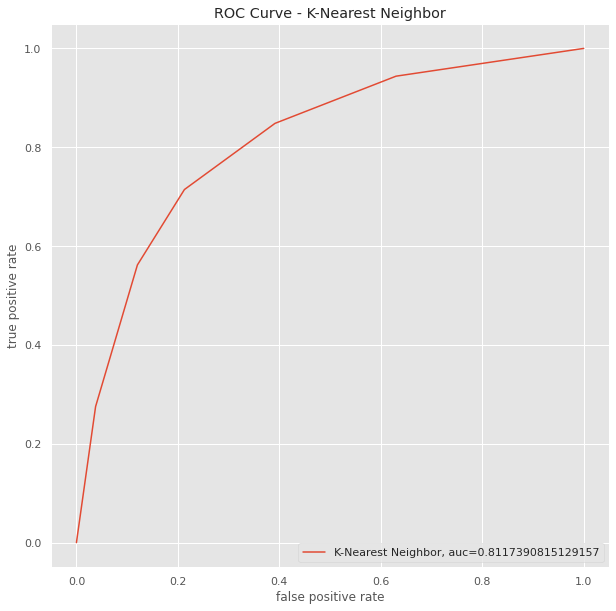

In [101]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Klasifikasi menggunakan Random Forest**

Modelling Random Forest

In [102]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest
rfo = RandomForestClassifier()
rfo.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfo= rfo.predict(X_test)

Model Evaluation

In [103]:
# Show the Confussion Matrix
cm_rfo = metrics.confusion_matrix(y_test, y_pred_rfo)
cm_rfo

array([[959, 206],
       [138, 930]])

In [104]:
# Show the Accuracy, Precision, Recall
acc_rfo = metrics.accuracy_score(y_test, y_pred_rfo)
prec_rfo = metrics.precision_score(y_test, y_pred_rfo)
rec_rfo = metrics.recall_score(y_test, y_pred_rfo)
f1_rfo = metrics.f1_score(y_test, y_pred_rfo)
kappa_rfo = metrics.cohen_kappa_score(y_test, y_pred_rfo)

print("Accuracy:", acc_rfo)
print("Precision:", prec_rfo)
print("Recall:", rec_rfo)
print("F1 Score:", f1_rfo)
print("Cohens Kappa Score:", kappa_rfo)

Accuracy: 0.8459471562919839
Precision: 0.8186619718309859
Recall: 0.8707865168539326
F1 Score: 0.8439201451905626
Cohens Kappa Score: 0.6921278891366698


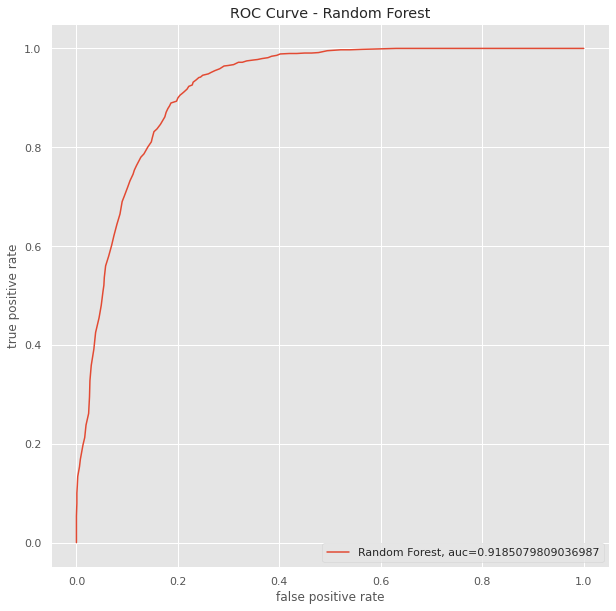

In [105]:
y_pred_rfo_proba = rfo.predict_proba(X_test)[::,1]
fprrfo, tprrfo, _ = metrics.roc_curve(y_test,  y_pred_rfo_proba)
aucrfo = metrics.roc_auc_score(y_test, y_pred_rfo_proba)
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Model Comparison**

In [111]:
# Comparing Model Performance
print("Decision Tree Accuracy = {0:.2f}%".format(acc_dtc*100))
print("Decision Tree Precision = {0:.2f}%".format(prec_dtc*100))
print("Decision Tree Recall = {0:.2f}%".format(rec_dtc*100))
print("Decision Tree F1-Score = {0:.2f}%".format(f1_dtc*100))
print("---------------------------------")
print("Naive Bayes Accuracy = {0:.2f}%".format(acc_gnb*100))
print("Naive Bayes Precision = {0:.2f}%".format(prec_gnb*100))
print("Naive Bayes Recall = {0:.2f}%".format(rec_gnb*100))
print("Naive Bayes F1-Score = {0:.2f}%".format(f1_gnb*100))
print("---------------------------------")
print("K-Nearest Neighbor Accuracy = {0:.2f}%".format(acc_knn*100))
print("K-Nearest Neighbor Precision = {0:.2f}%".format(prec_knn*100))
print("K-Nearest Neighbor Recall = {0:.2f}%".format(rec_knn*100))
print("K-Nearest Neighbor F1-Score = {0:.2f}%".format(f1_knn*100))
print("---------------------------------")
print("Random Forest Accuracy = {0:.2f}%".format(acc_rfo*100))
print("Random Forest Precision = {0:.2f}%".format(prec_rfo*100))
print("Random Forest Recall = {0:.2f}%".format(rec_rfo*100))
print("Random Forest F1-Score = {0:.2f}%".format(f1_rfo*100))

Decision Tree Accuracy = 77.30%
Decision Tree Precision = 72.24%
Decision Tree Recall = 85.30%
Decision Tree F1-Score = 78.23%
---------------------------------
Naive Bayes Accuracy = 71.70%
Naive Bayes Precision = 73.29%
Naive Bayes Recall = 64.23%
Naive Bayes F1-Score = 68.46%
---------------------------------
K-Nearest Neighbor Accuracy = 75.24%
K-Nearest Neighbor Precision = 75.47%
K-Nearest Neighbor Recall = 71.44%
K-Nearest Neighbor F1-Score = 73.40%
---------------------------------
Random Forest Accuracy = 84.59%
Random Forest Precision = 81.87%
Random Forest Recall = 87.08%
Random Forest F1-Score = 84.39%


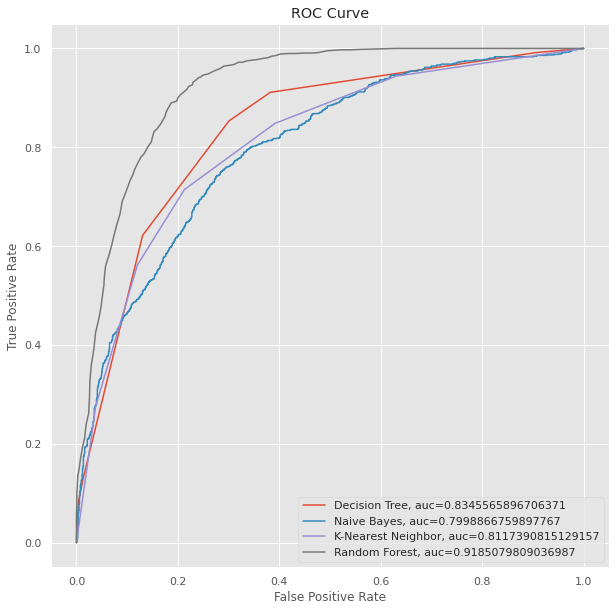

In [112]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## **Kesimpulan**

Berdasarkan 4 model klasifikasi yang sudah dilakukan yaitu Decision Tree, Naive Bayes, KNN, dan Random Forest, dapat disimpulkan bahwa:

**Nilai akurasi tertinggi yang dihasilkan terdapat pada metode RANDOM FOREST sebesar 84.59%**

**Nilai akurasi terendah yang dihasilkan terdapat pada metode NAIVE BAYES sebesar 71.70%**

Dari sini dapat disimpulkan kembali bahwa Random Forest adalah model klasifikasi terbaik untuk dataset bank.csv